In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme(style="whitegrid")

In [2]:
dir_name = 'C:/Users/hangbin/Google Drive/_New/Research/DeepHGLM/Simulation/data/'
data_type_list = [
    '1000-10-2-gamma', '100-100-2-gamma', '20-500-2-gamma', 
    '1000-10-0.5-logN','100-100-0.5-logN','20-500-0.5-logN',
    '1000-10-2-logN',  '100-100-2-logN' #,  '20-500-2-logN'
]
colnames = [
    'RMSE_p', 'RMSE_y', 'RMSE_mu', 'RMSE_log_mu', 'RMSE_p_new',
    'RMSE_y_new', 'RMSE_mu_new', 'RMSE_log_mu_new', 'RMSE_u', 'lambda'
]

model_names = ['N0', 'N1', 'N2', 'M0', 'M1', 'M2', 'M3']
label_overall = ['N0', 'N1', 'N2', 'M3']
label_propose = ['M0', 'M1', 'M2', 'M3']

# 0 = pearson, 1 = rmse(y), 2 = rmse(mu), 3 = rmse(log mu)
# 4 = pearson_new, 5 = rmse_new(y), 6 = rmse_new(mu), 7 = rmse(log mu)
# 8 = rmse(u), 9 = lambda

In [3]:
data_type = '1000-10-2-gamma'

# Compare the overall models

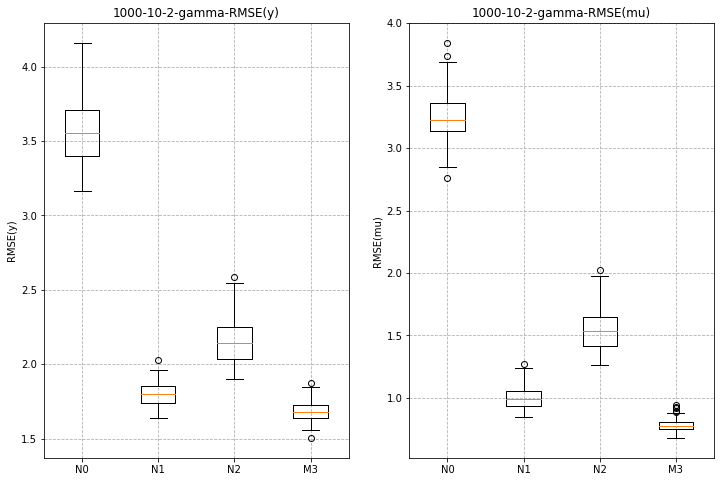

In [6]:
for data_type in data_type_list[0:1]:   

    lam = float(data_type.split('-')[2])

    N0 = pd.read_csv(dir_name+data_type+'-N0.csv')
    N1 = pd.read_csv(dir_name+data_type+'-N1.csv')
    N2 = pd.read_csv(dir_name+data_type+'-N2.csv')
    M0 = pd.read_csv(dir_name+data_type+'-M0.csv')
    M1 = pd.read_csv(dir_name+data_type+'-M1.csv')
    M2 = pd.read_csv(dir_name+data_type+'-M2.csv')
    M3 = pd.read_csv(dir_name+data_type+'-M3.csv')

    fig, axs = plt.subplots(1, 2, figsize=(12,6))

    axs[0].boxplot([
        # L0[:,1],
        # L1[:,1],
        N0['RMSE_y'],
        N1['RMSE_y'],
        N2['RMSE_y'],
        M3['RMSE_y'],
    ], labels = label_overall)
    axs[1].boxplot([
        # L0[:,1],
        # L1[:,1],
        N0['RMSE_mu'],
        N1['RMSE_mu'],
        N2['RMSE_mu'],
        M3['RMSE_mu'],
    ], labels = label_overall)

    axs[0].set_title(data_type+'-RMSE(y)')
    axs[0].set_ylabel('RMSE(y)')
    axs[0].grid(True, ls='--')

    axs[1].set_title(data_type+'-RMSE(mu)')
    axs[1].set_ylabel('RMSE(mu)')
    axs[1].grid(True, ls='--')

    #fig.savefig(dir_name+'boxplot-overall-'+data_type+'.pdf')
    

# Compare random effect models

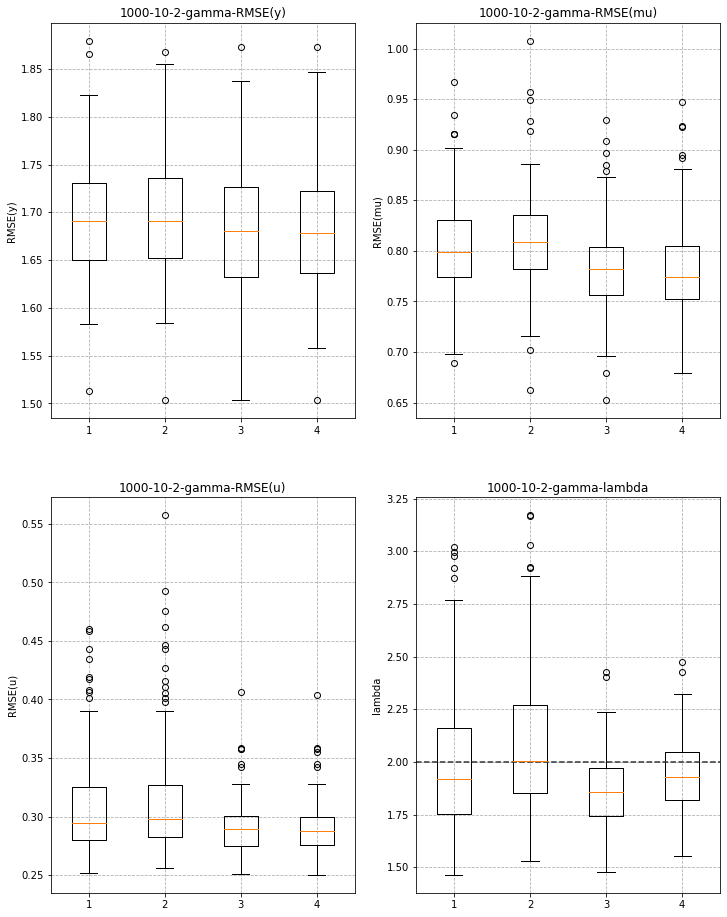

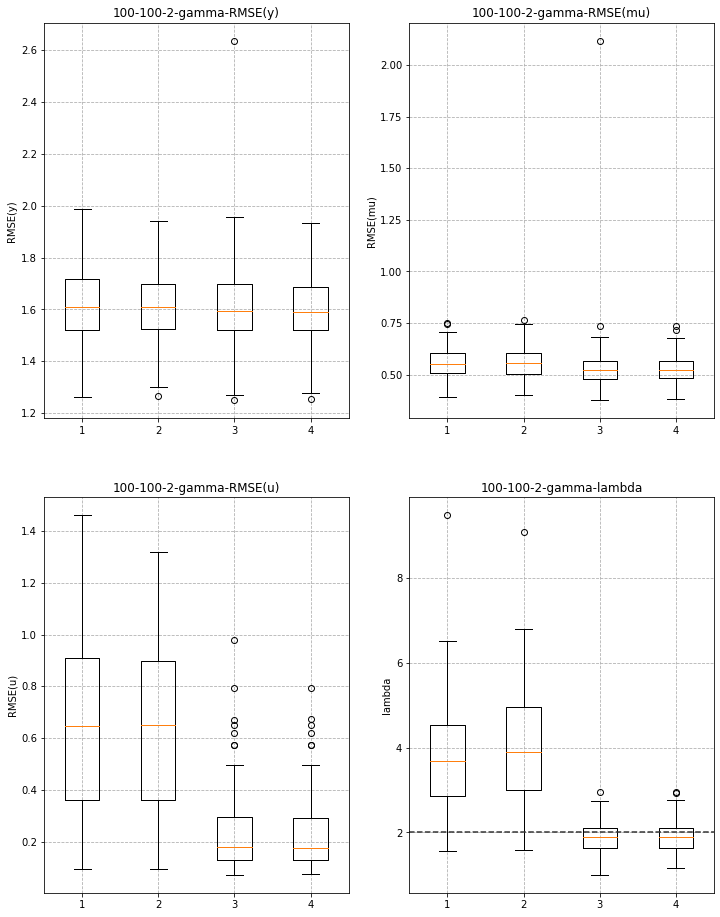

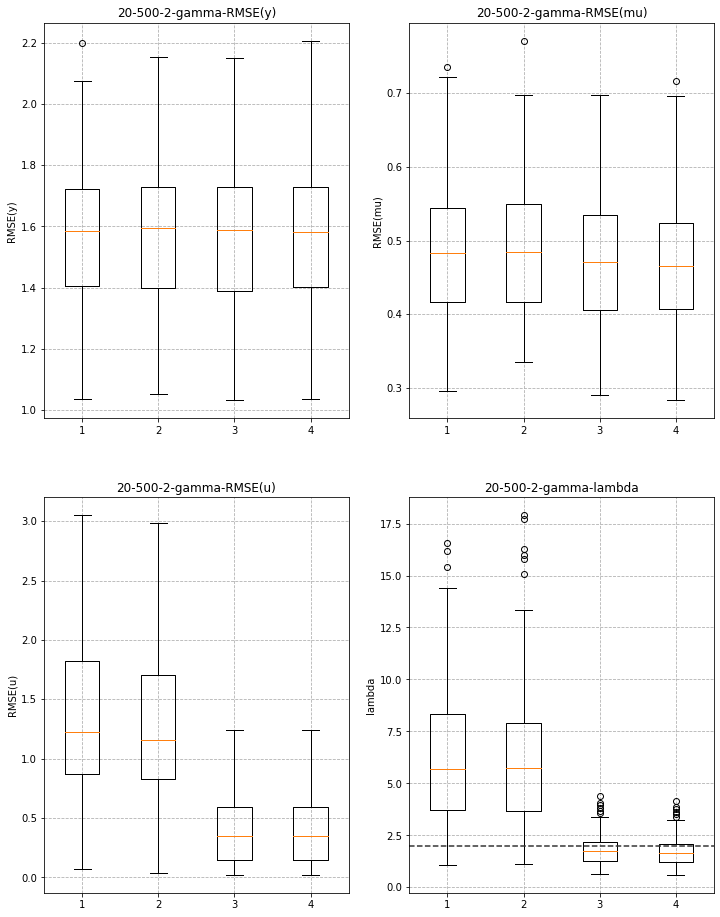

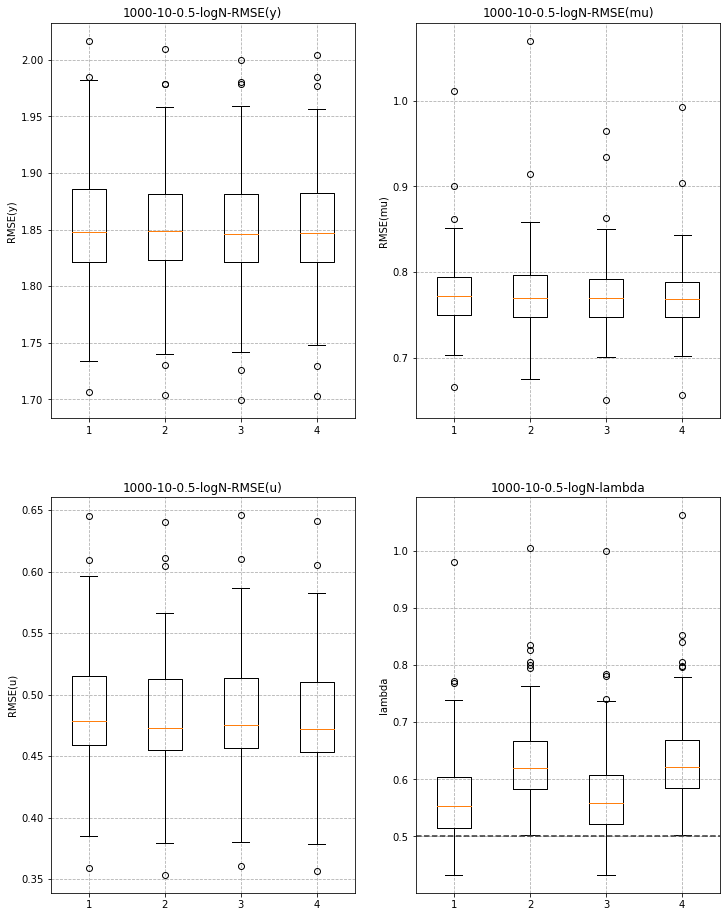

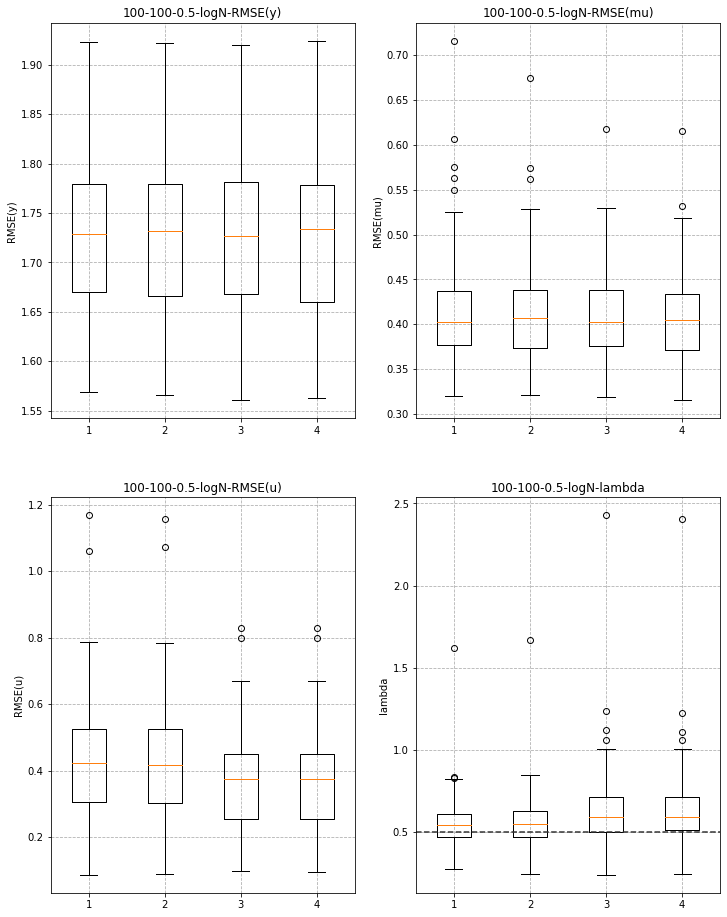

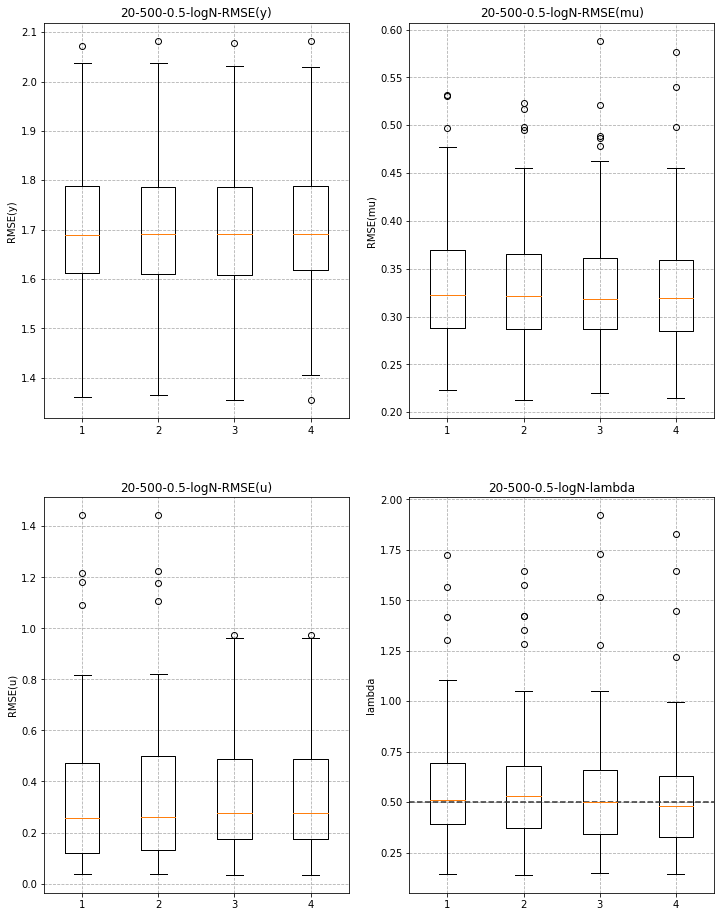

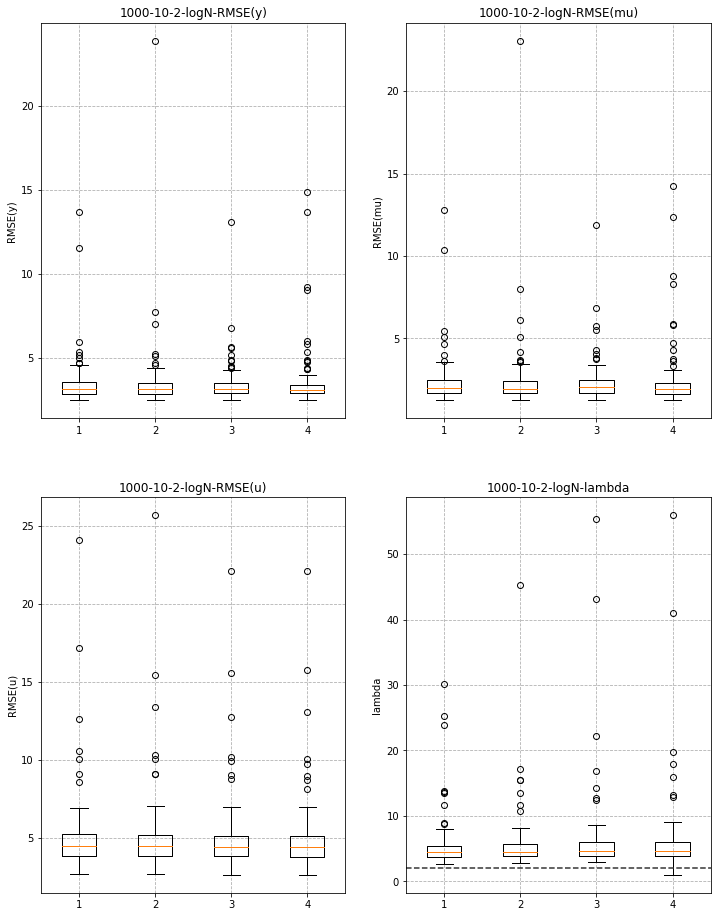

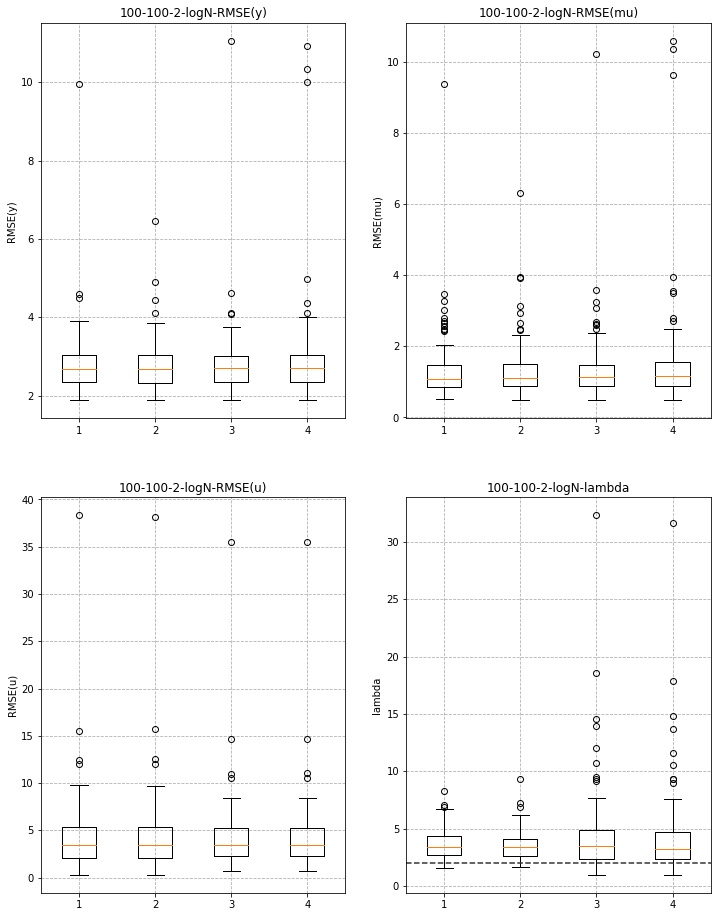

In [7]:
for data_type in data_type:   

    lam = float(data_type.split('-')[2])

    N0 = pd.read_csv(dir_name+data_type+'-N0.csv')
    N1 = pd.read_csv(dir_name+data_type+'-N1.csv')
    N2 = pd.read_csv(dir_name+data_type+'-N2.csv')
    M0 = pd.read_csv(dir_name+data_type+'-M0.csv')
    M1 = pd.read_csv(dir_name+data_type+'-M1.csv')
    M2 = pd.read_csv(dir_name+data_type+'-M2.csv')
    M3 = pd.read_csv(dir_name+data_type+'-M3.csv')
    

    # Compare poi-gam-NNs
    
    fig, axs = plt.subplots(2, 2, figsize=(12,16))
    
    axs[0,0].boxplot([
        # L1[:,1],
        M0['RMSE_y'],
        M1['RMSE_y'],
        M2['RMSE_y'],
        M3['RMSE_y'],
    ], labels=label_propose)
    axs[0,1].boxplot([
        # L1[:,1],
        M0['RMSE_mu'],
        M1['RMSE_mu'],
        M2['RMSE_mu'],
        M3['RMSE_mu'],
    ], labels=label_propose)
    axs[1,0].boxplot([
        # L1[:,1],
        M0['RMSE_u'],
        M1['RMSE_u'],
        M2['RMSE_u'],
        M3['RMSE_u'],
    ], labels=label_propose)
    axs[1,1].boxplot([
        # L1[:,1],
        M0['lambda'],
        M1['lambda'],
        M2['lambda'],
        M3['lambda'],
    ], labels=label_propose)
    
    axs[0,0].set_title(data_type+'-RMSE(y)')
    axs[0,0].set_ylabel('RMSE(y)')
    axs[0,0].grid(True, ls='--')

    axs[0,1].set_title(data_type+'-RMSE(mu)')
    axs[0,1].set_ylabel('RMSE(mu)')
    axs[0,1].grid(True, ls='--')

    axs[1,0].set_title(data_type+'-RMSE(u)')
    axs[1,0].set_ylabel('RMSE(u)')
    axs[1,0].grid(True, ls='--')

    axs[1,1].set_title(data_type+'-lambda')
    axs[1,1].set_ylabel('lambda')
    axs[1,1].axhline(lam, ls='--', c='.2')
    axs[1,1].grid(True, ls='--')

    # axs[2,0].boxplot([
    #     # L1[:,1],
    #     M0['RMSE_y_new'],
    #     M1['RMSE_y_new'],
    #     M2['RMSE_y_new'],
    #     M3['RMSE_y_new'],
    # ])
    # axs[2,1].boxplot([
    #     # L1[:,1],
    #     M0['RMSE_log_mu_new'],
    #     M1['RMSE_log_mu_new'],
    #     M2['RMSE_log_mu_new'],
    #     M3['RMSE_log_mu_new'],
    # ])
    #axs[2,0].set_title(data_type+'-RMSE(y)-new')
    #axs[2,0].set_ylabel('RMSE(y)')
    #axs[2,0].grid(True, ls='--')
    #
    #axs[2,1].set_title(data_type+'-RMSE(mu)-new')
    #axs[2,1].set_ylabel('RMSE(mu)')
    #axs[2,1].grid(True, ls='--')

    fig.savefig(dir_name+'boxplot-proposed-'+data_type+'.pdf')
    